In [1]:
import scanpy as sc

In [62]:
import numpy as np
import scanpy as sc
import pandas as pd
import scipy as sp
import muon as mu
from muon import atac as ac
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt 
# sc.set_figure_params(dpi=800)
matplotlib.rcdefaults()

from pathlib import Path
matplotlib_rc = { 
    # 'text': {'usetex': True}, 
    'font': {'family': 'serif'} } # Apply changes for k, v in matplotlib_rc.items(): rc(k, **v)
for k, v in matplotlib_rc.items():
          rc(k, **v)

from matplotlib import rcParams

FIGSIZE = (5, 5)
rcParams["figure.figsize"] = FIGSIZE

In [63]:
colors = plt.cm.tab20.colors

In [64]:
adata_celldreamer_atac = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/generated/pbmc10k_multimodal/generated_cells_0_atac.h5ad")
adata_real = mu.read("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/processed/atac/pbmc/pbmc10k_multiome_test.h5mu")
adata_celldreamer_rna = sc.read_h5ad("/home/icb/alessandro.palma/environment/celldreamer/project_folder/datasets/generated/pbmc10k_multimodal/generated_cells_0_rna.h5ad")

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [65]:
adata_rna = sc.AnnData(X=np.concatenate([adata_real["rna"].X.A, adata_celldreamer_rna.X.A]),
                      obs=pd.DataFrame({"dataset_type":["Real" for _ in range(len(adata_real["rna"]))] + ["Generated" for _ in range(len(adata_real["rna"]))]}))

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [66]:
sc.tl.pca(adata_rna)
sc.pp.neighbors(adata_rna)
sc.tl.umap(adata_rna)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


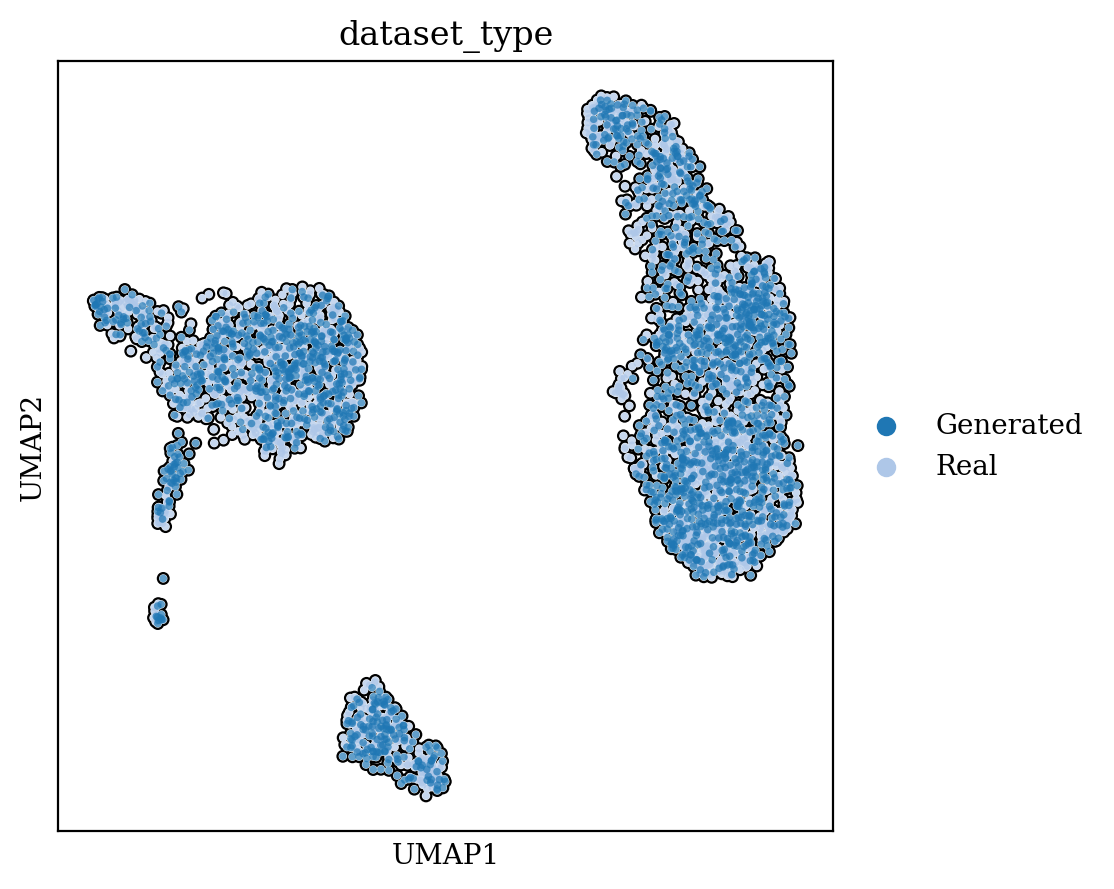

In [67]:
sc.pl.umap(adata_rna, color="dataset_type", palette=colors, s=30,add_outline=True, save="RNA.png")

In [68]:
adata_atac = sc.AnnData(X=np.concatenate([adata_real["atac"].X.A, adata_celldreamer_atac.X.A]),
                      obs=pd.DataFrame({"dataset_type":["Real" for _ in range(len(adata_real["atac"]))] + ["Generated" for _ in range(len(adata_celldreamer_atac))]}))

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [69]:
sc.tl.pca(adata_atac)
sc.pp.neighbors(adata_atac)
sc.tl.umap(adata_atac)

/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/icb/alessandro.palma/miniconda3/envs/celldreamer/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


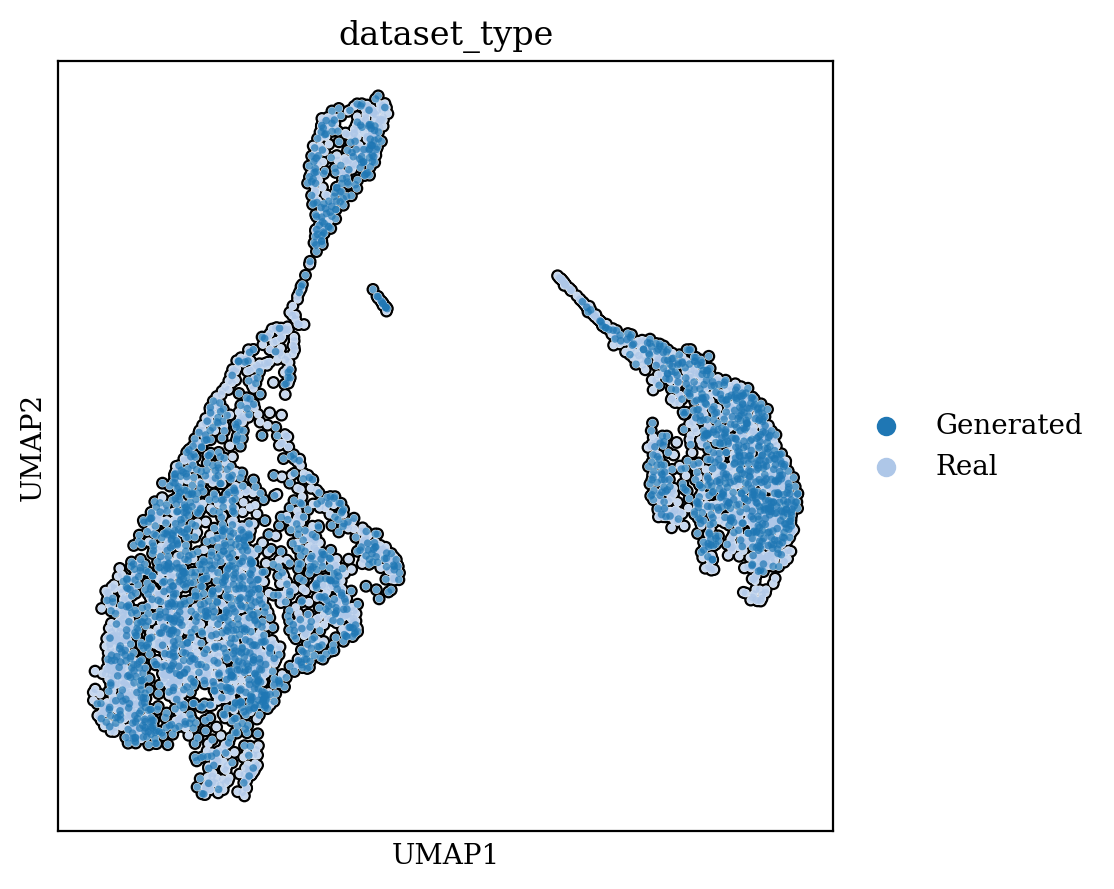

In [71]:
sc.pl.umap(adata_atac, color="dataset_type", palette=colors, s=30, add_outline=True, save="ATAC.png")